<div class="alert alert-block alert-success">
<b>Step 1:</b> Loading libraries necessary to be used in the course of the code. Also we create an artifical dataset having non-convex regions
</div>

In [1]:
import numpy as np 
from scipy.linalg import *
from sklearn.cluster import SpectralClustering
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline

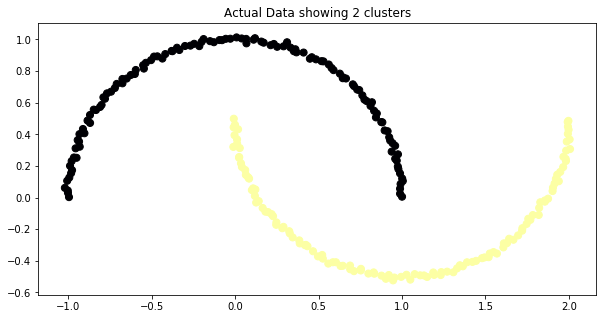

In [39]:
X,y = make_moons(250,random_state=19,noise=0.01)
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("Actual Data showing 2 clusters")
ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap = 'inferno');

<div class="alert alert-block alert-success">
<b>Step 2:</b> Creating our own Spectral Clustering Module.
</div>

In [12]:
class Spectral_clustering(object):
    def __init__(self,X,sigma_sq,n_components):
        self.X                         = X
        self.sigma_sq                  = sigma_sq
        self.n_components              = n_components
        self.sample_dict               = dict(zip(range(X.shape[0]),[list(X[i]) for i in range(X.shape[0])]))
        
    def create_affinity_matrix(self):
        self.A                         = np.zeros((self.X.shape[0],self.X.shape[0]))
        for i in range(self.X.shape[0]):
            for j in range(self.X.shape[0]):
                i_index                = self.sample_dict[i]
                j_index                = self.sample_dict[j]
                if i!=j:
                    z                  = np.array(i_index)-np.array(j_index)
                    self.A[i,j]        = np.exp(-1*((z.dot(z))**2)/(2.0*self.sigma_sq))
        return self.A
    
    def create_Laplacian(self):
        D                              = np.zeros((self.X.shape[0],self.X.shape[0]))
        self.D_sq_inv                  = np.zeros((self.X.shape[0],self.X.shape[0]))
        A                              = self.create_affinity_matrix()
        for i in range(D.shape[0]):
            for j in range(D.shape[1]):
                if i==j:
                    D[i,j]             = sum(A[i])
                    self.D_sq_inv[i,j] = D[i,j]**-0.5
        self.L = (self.D_sq_inv.dot(A)).dot(self.D_sq_inv)
        return self.L
    
    def fit(self):
        L                              = self.create_Laplacian()
        eigvals,eigvecs                = np.linalg.eig(L)
        X_mat                          = eigvecs[:,:self.n_components]
        Y                              = np.array([list(X_mat[i]/(sum(X_mat[i]**2))**0.5) for i in range(X_mat.shape[0])])
        kmeans                         = KMeans(n_clusters = self.n_components, n_init=100,max_iter=1000).fit(Y)
        self.labels                    = kmeans.labels_
        pass
        

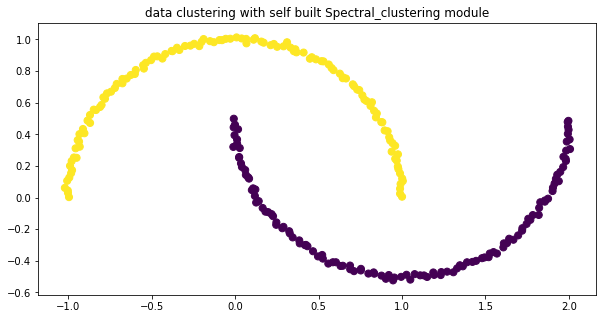

In [38]:
spec_our  = Spectral_clustering(X,sigma_sq=0.005,n_components=2)
spec_our.fit()
our_labels = spec_our.labels
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("data clustering with self built Spectral_clustering module")
ax.scatter(X[:,0],X[:,1],c=our_labels,s=50)

<div class="alert alert-block alert-success">
<b>Step 3:</b> Analyzing the effect of scaling parameter sigma_sq on cluster creation
</div>

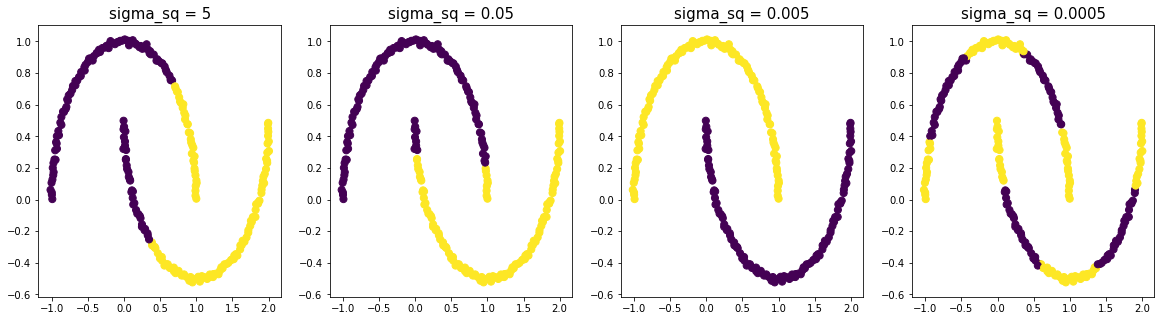

In [37]:
fig     = plt.figure(figsize=(20, 5))
columns = 4
rows    = 1
sigma_sq_vals = [5,0.05,0.005,0.0005]
for i in range(1, columns*rows +1):
    
    spec_our  = Spectral_clustering(X,sigma_sq=sigma_sq_vals[i-1],n_components=2)
    spec_our.fit()
    our_labels = spec_our.labels
    
    fig.add_subplot(rows, columns, i)
    plt.title('sigma_sq = '+str(sigma_sq_vals[i-1]),fontsize=15)
    plt.scatter(X[:,0],X[:,1],c=our_labels,s=50)

<div class="alert alert-block alert-success">
<b>Step 4:</b> Using inbuilt Spectral Clustering Module 
</div>

In [40]:
specs = SpectralClustering(n_clusters =2,gamma =10.0,assign_labels ='discretize')
specs.fit(X)
labels_inbuilt = specs.labels_
specs

SpectralClustering(affinity='rbf', assign_labels='discretize', coef0=1,
                   degree=3, eigen_solver=None, eigen_tol=0.0, gamma=10.0,
                   kernel_params=None, n_clusters=2, n_init=10, n_jobs=None,
                   n_neighbors=10, random_state=None)

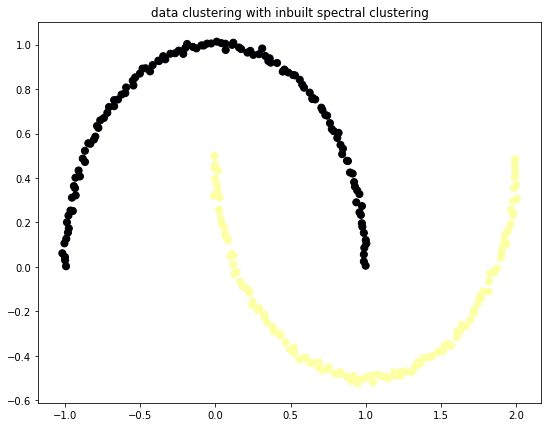

In [42]:
fig,ax = plt.subplots(figsize=(9,7))
ax.set_title("data clustering with inbuilt spectral clustering")
ax.scatter(X[:,0],X[:,1],c=labels_inbuilt,s=50,cmap = 'inferno');

<div class="alert alert-block alert-success">
<b>Step 5:</b> Applying K-means clustering on the data X to find the difference
</div>

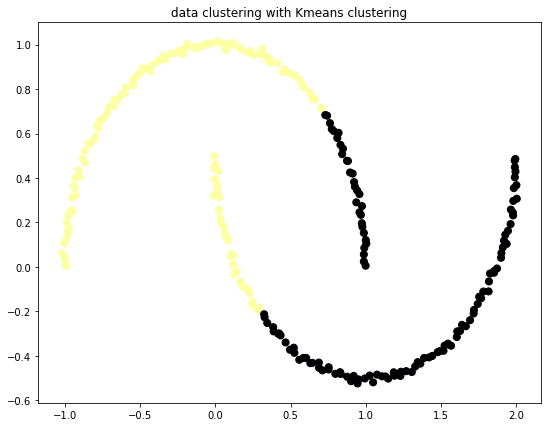

In [45]:
kmeans    = KMeans(n_clusters=2)
kmeans.fit(X)
kmeanslabel = kmeans.labels_
fig,ax = plt.subplots(figsize=(9,7))
ax.set_title("data clustering with Kmeans clustering")
ax.scatter(X[:,0],X[:,1],c=kmeanslabel,s=50,cmap = 'inferno');